## Skew-T Analysis
Classic skew-T/log-p plot using data from University of Wyoming. </br>

This example uses MetPy to plot the classic skew-T with Temperature, Dewpoint, and wind barbs.

https://github.com/Unidata/python-training/blob/master/pages/gallery/SkewT_Example.ipynb

In [2]:
from datetime import datetime

import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import pandas_dataframe_to_unit_arrays, units
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir

### Set time using a datetime object and station as variables

Maps of the NWS Rawinsonde Network
https://www.weather.gov/upperair/nws_upper

In [3]:
dt = datetime(2020, 1, 27, 12)
station = 'CHH' # Use three characters without K in the beginning.

## Grab Remote Data
This requires an internet connection to access the sounding data from a remote server at the University of Wyoming.

In [4]:
# Read remote sounding data based on time (dt) and station
df = WyomingUpperAir.request_data(dt, station)

# Create dictionary of united arrays
data = pandas_dataframe_to_unit_arrays(df)

Isolate variables and attach units

In [5]:
# Isolate united arrays from dictionary to individual variables
p = data['pressure']
T = data['temperature']
Td = data['dewpoint']
u = data['u_wind']
v = data['v_wind']

## Make Skew-T Plot
The code below makes a basic skew-T plot using the MetPy plot module that contains a SkewT class.

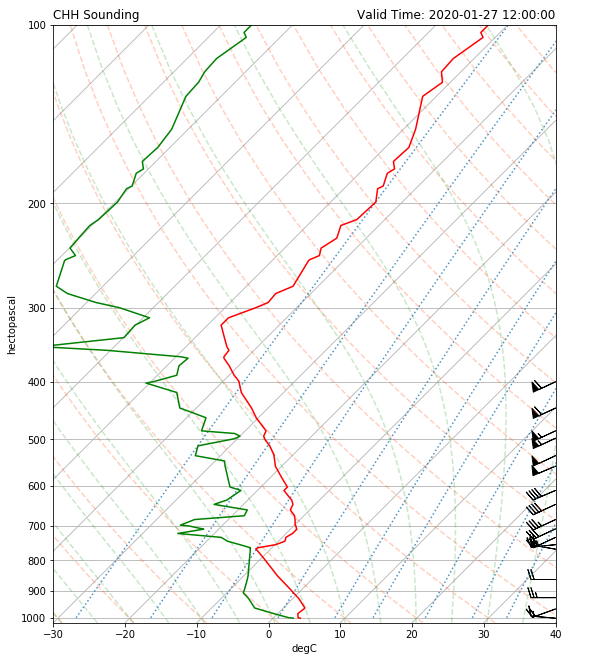

In [7]:
# Change default to be better for skew-T
fig = plt.figure(figsize=(9, 11))

# Initiate the skew-T plot type from MetPy class loaded earlier
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p[::3], u[::3], v[::3], y_clip_radius=0.03)

# Set some appropriate axes limits for x and y
skew.ax.set_xlim(-30, 40)
skew.ax.set_ylim(1020, 100)

# Add the relevant special lines to plot throughout the figure
skew.plot_dry_adiabats(t0=np.arange(233, 533, 10) * units.K,
                       alpha=0.25, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K,
                         alpha=0.25, color='tab:green')
skew.plot_mixing_lines(p=np.arange(1000, 99, -20) * units.hPa,
                       linestyle='dotted', color='tab:blue')

# Add some descriptive titles
plt.title('{} Sounding'.format(station), loc='left')
plt.title('Valid Time: {}'.format(dt), loc='right');